# Load required libraries

In [9]:
import time
import librosa
from dtw import dtw
import librosa.display
from scipy.spatial.distance import cdist

# Load two sample audio data to memory

In [3]:
y1, sr1 = librosa.load('train/fcmc0-a1-t.wav')
y2, sr2 = librosa.load('train/fcmc0-b1-t.wav')

# Calculate MFCC features and plot on graph

Populating the interactive namespace from numpy and matplotlib


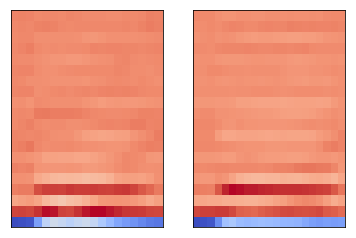

In [4]:
%pylab inline
subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

In [6]:
# Calculate the DTW between the 2 sample audios 'a' and 'b'
dist, cost, path, _ = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)   

Normalized distance between the two sounds: 141.228637029


# Main Program

In [7]:
import os
dirname = "train"
files = [f for f in os.listdir(dirname) if not f.startswith('.')]

The following code Iterates through the Training folder and builds the trained representation in the Distance matrix

In [13]:
start = time.clock()
minval = 200
distances = ones((len(files), len(files)))
y = ones(len(files))

for i in range(len(files)):
    y1, sr1 = librosa.load(dirname+"/"+files[i])
    mfcc1 = librosa.feature.mfcc(y1, sr1)
    for j in range(len(files)):
        y2, sr2 = librosa.load(dirname+"/"+files[j])
        mfcc2 = librosa.feature.mfcc(y2, sr2)
        dist, _, _, _ = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
#         print files[i],mfcc1.T[0][0],mfcc2.T[0][0],files[j],dist
#         if dist<minval:
#             minval = dist
        distances[i,j] = dist
    if i%2==0:
        y[i] = 0  #'a'
    else:
        y[i] = 1  #'b'
print("Time used: {}s".format(time.clock()-start))

Time used: 160.74331600000002s


In [14]:
distances[0] # A dict

array([   0.        ,  141.22863703,  163.99821788,  192.95202935,
        151.85852349,  170.48576354,  135.5725408 ,  152.26686475,
        145.76102835,  193.40727232,  137.6427781 ,  161.33156836,
        164.65027339,  167.04712037,  176.97619763,  181.20389263,
        141.65409762,  168.92626794,  148.07675071,  191.99366183,
        152.1781625 ,  193.17680236,  192.36134112,  199.68962323])

In [15]:
#a = 155.156
#b = 184.702
#c = 158.231
label = ['a','b']

# Train a kNN classifier to determine if the audio is 'a' or 'b'

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(distances, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# Test a sample from the test folder

In [17]:
y, sr = librosa.load('test/farw0-b1-t.wav')
mfcc = librosa.feature.mfcc(y1, sr1)
distanceTest = []
for i in range(len(files)):
    y1, sr1 = librosa.load(dirname+"/"+files[i])
    mfcc1 = librosa.feature.mfcc(y1, sr1)
    dist, _, _, _ = dtw(mfcc.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
    distanceTest.append(dist)

* Warning: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample. DeprecationWarning)
* [Solution](http://blog.csdn.net/qq_21063873/article/details/60963038)

In [21]:
# pre = classifier.predict(distanceTest)[0] # False
pre = classifier.predict([distanceTest])[0]
print(pre)

1.0


In [25]:
label[int(pre)]

'b'

In [28]:
print("Predict audio is: '{}'".format(label[int(pre)]))

Predict audio is: 'b'
